### I: Introduction
Cet ensemble de données provient à l'origine de l'Institut national du diabète et des maladies digestives et rénales. 

### II: Description de la base de données:
Cet ensemble de données provient à l'origine de l'Institut national du diabète et des maladies digestives et rénales. 
Plusieurs contraintes ont été imposées à la sélection de ces cas à partir d'une base de données plus vaste. En particulier, tous les patients ici sont des femmes d'au moins 21 ans d'origine indienne Pima.
Caracteristiques des patiences
- Grossesses : Nombre de fois où j'ai été enceinte
- Glucose : Concentration de glucose plasmatique après 2 heures lors d'un test oral de tolérance au glucose
- Tension artérielle : tension artérielle diastolique (mm Hg)
- Épaisseur de la peau : Épaisseur du pli cutané du triceps (mm)
- Insuline : insuline sérique de 2 heures (mu U/ml)
- IMC : Indice de masse corporelle (poids en kg/(taille en m)^2)
- DiabetesPedigreeFunction : Fonction généalogie du diabète
- Âge : Âge (années)
- Résultat : variable de classe (0 ou 1)

**L'objectif est de prédire, à partir de mesures diagnostiques, si un patient est diabétique.**

### III:Plan de travail
#### 1- Importation des librairies
#### 2-Chargement de la base de données
#### 3-Analyse exploratoire des données
- Affichage des données
- Information générale de la base de données
- Résumé statistiques
- Gestion des valeurs manquantes
- Gestion des doublons
- Analyse univariée
- Analyse multivariée
- Gestion des valeurs abérrantes
#### 4-Pré-traitement des données
- Encodage de variables categorielle
- Division des données
- Gestion des deséquilibre des classes
- Normalisation des données
#### 5- Modélisation
- Selection des meilleures variables
- LogisticRegression
- Arbre de decision
- RandomForest classifier
- KNN
- SVM Classifier
#### 6-Conclusion



# 1 : Importation des librairies

In [71]:

# librairies d'analyse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

# librairies de pretraitement et selection
from  sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
# librairies de modelistion
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# librairies de mésures de performances
from sklearn.metrics import accuracy_score,recall_score,precision_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
# librairies e'enregistrement de modele
import joblib

#--librairies des graphiques interactif
import ipywidgets as widgets
from ipywidgets import interact,interactive,fixed,interact_manual
from sklearn.utils import resample

# 2: Chargement de la base de données

In [3]:
# chargement de la base données
file="datasets_bd/db/diabetes.csv"
data = pd.read_csv(file)


In [4]:
# Affichage des 10 Premieres observation
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
# information générales de la base de donnés
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Cet jeu de données contient 768 obsevations avec 9 variables numériques et il occupe 54.1 KB espace memoire

In [6]:
# Statistique récaputilatives
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# gestion des valeurs manquantes
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pas de valeurs manquantes

In [8]:
# Gestion des doublons
data.duplicated().sum()

np.int64(0)

Pas de doublons

In [9]:
# Analyse Univariée
cols=data.columns.tolist()
#-------fonction d'analyse univariée-----------
def hist_plot(a):
    plt.figure(figsize=(10,5))
    sns.histplot(x=a,data=data, kde=True).set_title("Histogramme de "+str(a))
    return plt.show()
#---------fonction d'analyse bivariée-----------

def cat_plot(a):
    plt.figure(figsize=(10,5))
    sns.catplot(col='Outcome', y=a,data=data, kind='box')
    return plt.show()

#---------fonction d'analyse multivariée-----------
graphis=["scatter","line"]
def rel_plot(X,Y,C):
    plt.figure(figsize=(10,5))
    sns.relplot(x=X,y=Y,hue='Outcome',data=data,kind=C)
    return plt.show()


In [10]:
# Analyse Univariée
interact(hist_plot,a=cols)

interactive(children=(Dropdown(description='a', options=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick…

<function __main__.hist_plot(a)>

In [11]:
# Analyse biivariée
interact(cat_plot,a=cols)

interactive(children=(Dropdown(description='a', options=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick…

<function __main__.cat_plot(a)>

In [12]:
# Analyse multiiivariée
interact(rel_plot,X=cols,Y=cols,C=graphis)

interactive(children=(Dropdown(description='X', options=('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThick…

<function __main__.rel_plot(X, Y, C)>

Gestion des valeurs abérrantes:
D'apres les graphiques, nous constatons qu'il y a des valeurs abérrantes, mes comme nous ne poccesons d'informations suplementaires sur ces données, alors nous allons les considéré comme des données réelles en les utilisant comme sont elles dans la phase de modélisation

# 4: Préparation des données pour la modélisation
Nous allons tester plusieurs modeles afin de choisir celui est mieu adapté à notre probl-matiques.
Pour cele nous divisé notre jeu de données en trois parties:
- Train_data: Pour entrainner le modele
- Test_data : Pour test la performance des modeles et choisir le meilleure
- Val_data : Pour Evaluer le meilleure sur sa capacité à généraliser sur les nouvelles données

In [74]:

# Division des données
# reprodictivité du modele
seed=95

df=data.copy()
x=df.drop('Outcome',axis=1)
y=df['Outcome']
# 70% en Train et 30% en test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=seed,stratify=y)

# 50% en val et 50% en test
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test, test_size=0.5,random_state=95,stratify=y_test)


# Gestion des deséquilibre des classe
IL est import de s'assurer qu'il n y a pas trop de deséquible de classe dans nos données, c'est a dire , dans notre cas,il ne faudrai pas qu'il y ai plus de personne qui sont diabetiques par rapport à ceux qui ne sont pas diabétiques et l'inversement. Snon, cela peut affecter considerable le modele, car il va priveligé la classe majoritaire par rapport à la classe minoritaire.
Pour résoudre cet probleme, nous avons deux (2) Méhodes:
- Le Sur-echantillonage: Augmentation de la classe Minoritaire
- Le Sous-échantillonage: Réduction de la classe Minoritaire

Text(0.5, 1.0, 'Proportion sur les données de validation')

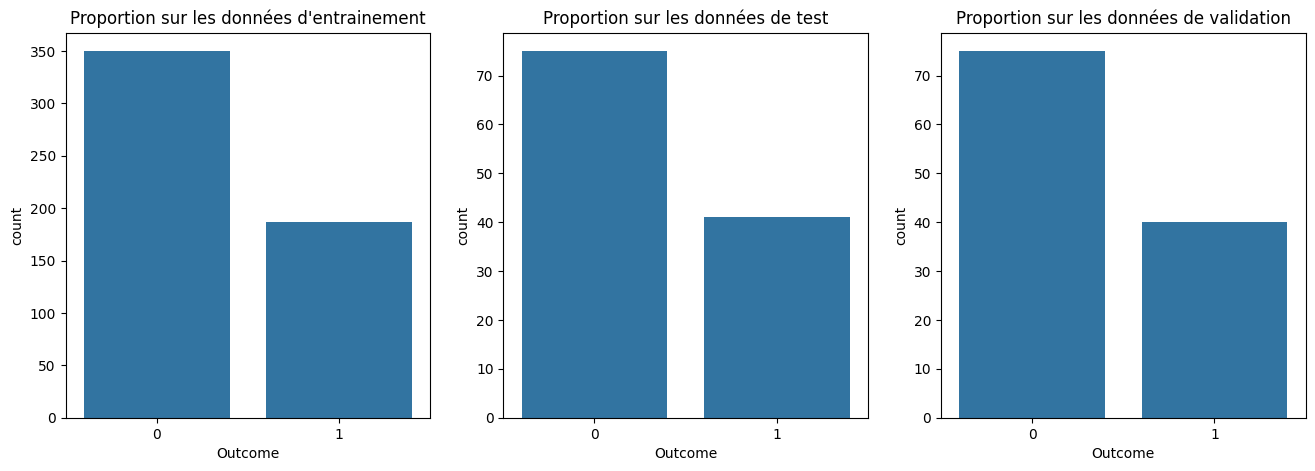

In [75]:
# Verication
plt.figure(figsize=(16,5))
plt.subplot(131)
sns.countplot(x=y_train).set_title("Proportion sur les données d'entrainement")
plt.subplot(132)
sns.countplot(x=y_test).set_title("Proportion sur les données de test")
plt.subplot(133)
sns.countplot(x=y_val).set_title("Proportion sur les données de validation")

Nous remarquons qu'il ya plus de personne Non diabetique que des personnes diabetiques

In [76]:
# Résolution du probleme de désequilibre de classe : Methode de Sur-échantillonage
x2 = x_train
x2['Outcome']= y_train.values
minority=x2[x2['Outcome']==1]
majority=x2[x2['Outcome']==0]
# mehode de sur-echantillonnage : resample de sklearn (tirage avec remise)
minority_upsample=resample(minority,n_samples= len(majority), replace = True,random_state=seed)
upsampled = pd.concat([majority,minority_upsample])

# donnéées d'entrainnement sur la base de données sur-echantillonnées
x_train_up=upsampled.drop('Outcome',axis=1)
y_train_up=upsampled['Outcome']

# Résolution du probleme de désequilibre de classe : Methode de Sous-échantillonage
# mehode de sur-echantillonnage : resample de sklearn (tirage avec remise replace=False)
majority_downsample=resample(majority,n_samples= len(minority), replace = False,random_state=seed)
downsampled = pd.concat([minority,majority_downsample])
downsampled 

# donnéées d'entrainnement sur la base de données sous-echantillonnées
x_train_down=downsampled.drop('Outcome',axis=1)
y_train_down=downsampled['Outcome']

Text(0.5, 1.0, 'Proportion sur les données de sous-échantillonage')

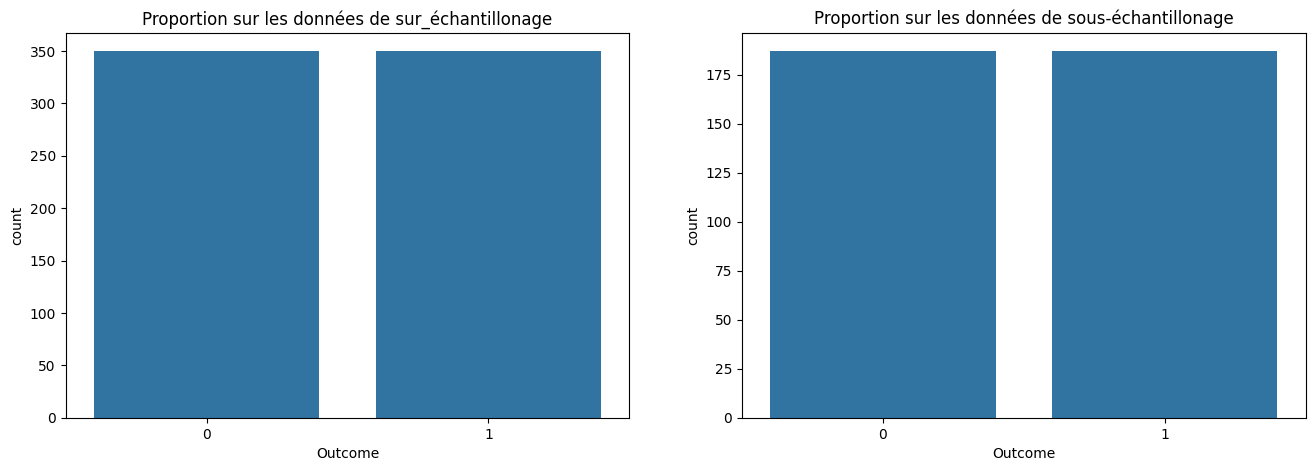

In [77]:
# Verication apres traitement

plt.figure(figsize=(16,5))
plt.subplot(121)
sns.countplot(x=y_train_up).set_title("Proportion sur les données de sur_échantillonage")
plt.subplot(122)
sns.countplot(x=y_train_down).set_title("Proportion sur les données de sous-échantillonage")


Choix des variables d'entrainement

In [107]:
# Choix possibles: (x_train,y_train),(x_train_up,y_train_up) ou (x_train_down,y_train_down)

train_features=x_train_up
train_labels = y_train_up

### Normalisation des données
La normalisation consiste à une mise à échelle des données par la méthode de :
- MinMaxScaler: Ramener toutes les données dans un intervalle de 0 à 1
- StandarScalr : Remplacer les valeurs par leur Z-score c-a-d metre la moyenne à 0 et l'écart-type à 1 de toutes les données

In [108]:
#MinMaxscaler
scaler = MinMaxScaler()
# scaler= StandardScaler()
scaler_mod=scaler.fit(train_features)
train_features=scaler_mod.transform(train_features)
x_test=scaler_mod.transform(x_test)
x_val=scaler_mod.transform(x_val)

# transformation en dataframe
train_features=pd.DataFrame(train_features, columns=x.columns)
x_test=pd.DataFrame(x_test, columns=x.columns)
x_val=pd.DataFrame(x_val, columns=x.columns)

# 5 : Modélisation
Dans notre cas, le problematique consiste à construire un modele de classification pour prédire si une patiente est diabetiques ou non, donc allons choisir les métrics d'évaluation pour se rassurer d'avoir un bon modéle qui nous fournit des meilleurs performance.
Les metriques nous allons utilisés sont les suivants:
- Matrice de confusions: Donne le total des bon classement et des mauvais classement
- F1-Score: qui est l'équilibre entre le rapel et la précision: pour un bon modele F1score vaut 1 et 0 pour un mauvais modele



Selection des meilleures variables prédictrices
Il existe plusoeirs méthodes de selectionner des meilleures variables , parmis lesquels nous avons: les Methodes ensemblists (Arbre de decision ou foret aleatoire)
Dans notre cas nous allons utiliser la methode de foret aleatoire

In [109]:
rf  = RandomForestClassifier()

rf.fit(train_features,train_labels)
print(classification_report(y_test,rf.predict(x_test)))


              precision    recall  f1-score   support

           0       0.65      1.00      0.79        75
           1       0.00      0.00      0.00        41

    accuracy                           0.65       116
   macro avg       0.32      0.50      0.39       116
weighted avg       0.42      0.65      0.51       116



e:\exerces G-6\AED\Projets_reel\diabetes\.venv_diabete\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\exerces G-6\AED\Projets_reel\diabetes\.venv_diabete\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\exerces G-6\AED\Projets_reel\diabetes\.venv_diabete\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

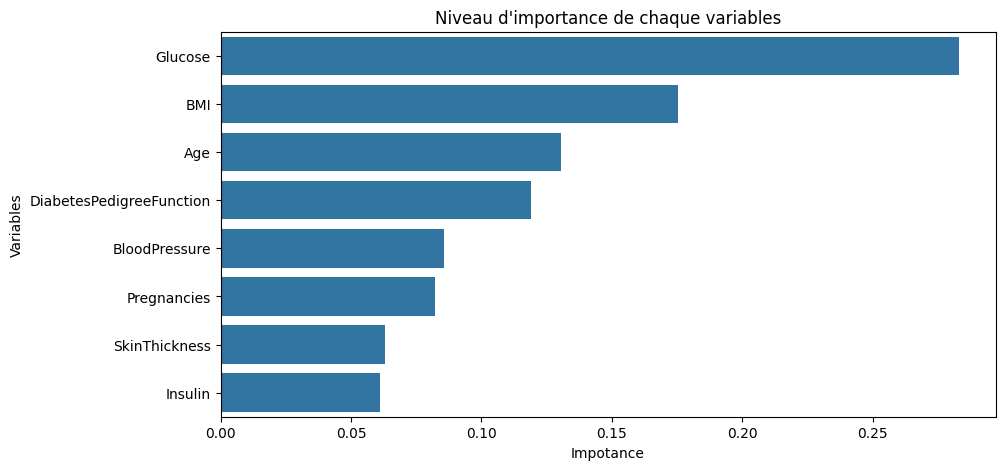

In [110]:
# selection des variables les plus importantes
vars_imp = pd.Series(rf.feature_importances_, index=train_features.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=vars_imp, y=vars_imp.index).set_title("Niveau d'importance de chaque variables")
plt.xlabel("Impotance")
plt.ylabel("Variables")
plt.show()

In [111]:
vars_imp

Glucose                     0.282939
BMI                         0.175394
Age                         0.130496
DiabetesPedigreeFunction    0.118980
BloodPressure               0.085685
Pregnancies                 0.082282
SkinThickness               0.063087
Insulin                     0.061136
dtype: float64

In [112]:
# selection 
seuil=0.08
vars_selected=vars_imp[vars_imp>seuil].index.tolist()

train_features=train_features[vars_selected]
x_test=x_test[vars_selected]
x_val=x_val[vars_selected]

vars_selected

['Glucose',
 'BMI',
 'Age',
 'DiabetesPedigreeFunction',
 'BloodPressure',
 'Pregnancies']

### A: Algorithme de Regression logistic

In [113]:
# fonction d'evaluation de modele
def evaluation_models(model):
    # prediction sur les données entrainement
    train_pred = model.predict(train_features)

    print("Performances sur les données d'entrainemment")
    accuracy = accuracy_score(train_labels,train_pred)
    recall = recall_score(train_labels,train_pred)
    precision = precision_score(train_labels,train_pred)

    print("Accuracy : ",round(accuracy,2))
    print("Recall : ",round(recall,2))
    print("Precision : ",round(precision,2))


    cm = confusion_matrix(train_labels,train_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    cmd.plot()
    plt.show()

    
    # prediction sur les données de test
    train_pred = model.predict(x_test) 

    print("Performances sur les données de test")
    accuracy = accuracy_score(y_test,train_pred)
    recall = recall_score(y_test,train_pred)
    precision = precision_score(y_test,train_pred)

    print("Accuracy : ",round(accuracy,2))
    print("Recall : ",round(recall,2))
    print("Precision : ",round(precision,2))

    cm = confusion_matrix(y_test,train_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    cmd.plot()
    plt.show()


In [114]:
# definition de la classe
lr = LogisticRegression(random_state=seed)
# dictionnaire des hyperparametres
grid_params ={"C":[0.001,0.0001,0.02,0.3,5,10,20,50,100]}
 # recherche des hypermarametres
grid_class = GridSearchCV(estimator=lr, 
                          param_grid=grid_params,
                          scoring="f1",cv=5)

# enrainement du modele
lr_grid_class = grid_class.fit(train_features,train_labels)

# affichage des hyperparametres

print("Parametres optimaux: ",lr_grid_class.best_estimator_)
print("Score : ",lr_grid_class.best_score_)

Parametres optimaux:  LogisticRegression(C=20, random_state=95)
Score :  0.7707922573446149


Performances sur les données d'entrainemment
Accuracy :  0.78
Recall :  0.77
Precision :  0.79


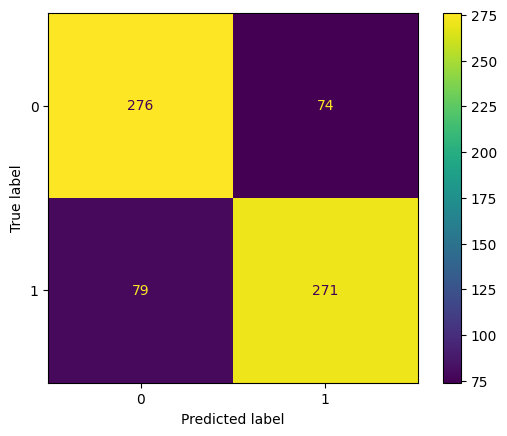

Performances sur les données de test
Accuracy :  0.65
Recall :  0.0
Precision :  0.0


e:\exerces G-6\AED\Projets_reel\diabetes\.venv_diabete\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


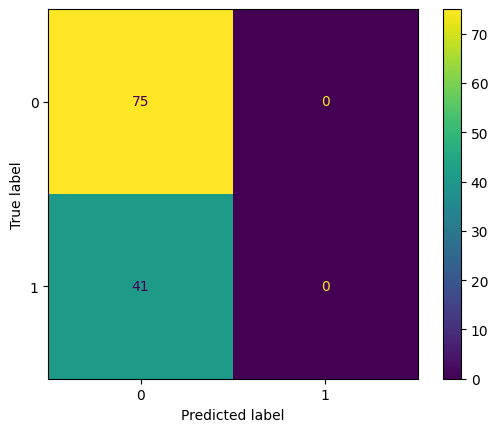

In [115]:
# evaluation du modele
evaluation_models(lr_grid_class.best_estimator_)

## B: Algorithme de foret aleatoire

In [116]:
# definition de la classe
rf = RandomForestClassifier(random_state=seed)
# dictionnaire des hyperparametres
grid_params ={"n_estimators" : [5,10,20,30,40,50,100,500,1000], "criterion" : ['gini','entropy'],
             "max_depth": [2,3,4,5,10,15,20], "max_features" : [2,3,4,5,10]}
 # recherche des hypermarametres
grid_class = GridSearchCV(estimator=rf, 
                          param_grid=grid_params,
                          scoring="f1",cv=5)

# enrainement du modele
rf_grid_class = grid_class.fit(train_features,train_labels)

# affichage des hyperparametres

print("Parametres optimaux: ",rf_grid_class.best_estimator_)
print("Score : ",rf_grid_class.best_score_)

Parametres optimaux:  RandomForestClassifier(criterion='entropy', max_depth=20, max_features=2,
                       n_estimators=30, random_state=95)
Score :  0.8951636641940421


e:\exerces G-6\AED\Projets_reel\diabetes\.venv_diabete\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Performances sur les données d'entrainemment
Accuracy :  1.0
Recall :  1.0
Precision :  1.0


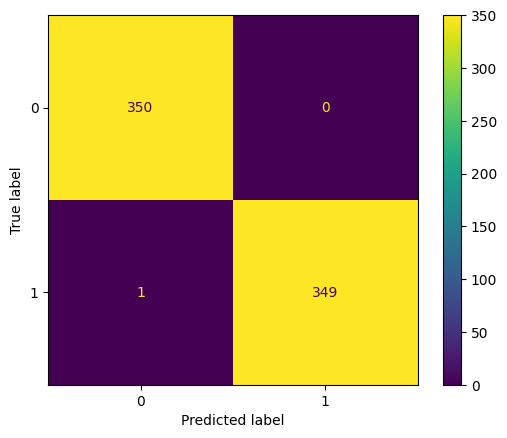

Performances sur les données de test
Accuracy :  0.65
Recall :  0.0
Precision :  0.0


e:\exerces G-6\AED\Projets_reel\diabetes\.venv_diabete\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


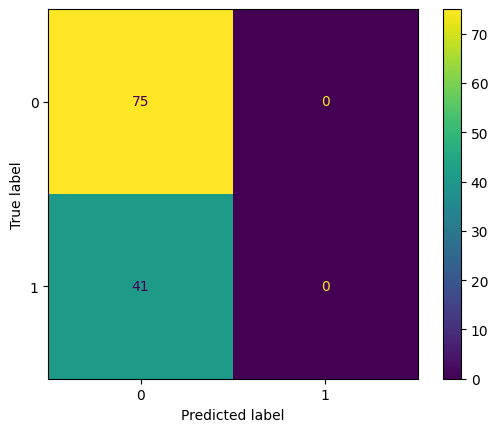

In [117]:
# evaluation du modele random forest
evaluation_models(rf_grid_class.best_estimator_)

# C : SVM Classifier

In [118]:
# definition de la classe
svmc = SVC(random_state=seed)
# dictionnaire des hyperparametres
grid_params ={"C":[0.001,0.0001,0.00001],"kernel" : ["linear", "poly", "rbf", "sigmoid"]}
 # recherche des hypermarametres
grid_class = GridSearchCV(estimator=svmc, 
                          param_grid=grid_params,
                          scoring="f1",cv=5)

# enrainement du modele
svmc_grid_class = grid_class.fit(train_features,train_labels)

# affichage des hyperparametres

print("Parametres optimaux: ",svmc_grid_class.best_estimator_)
print("Score : ",svmc_grid_class.best_score_)

Parametres optimaux:  SVC(C=0.001, random_state=95)
Score :  0.7578606075423531


Performances sur les données d'entrainemment
Accuracy :  0.77
Recall :  0.8
Precision :  0.75


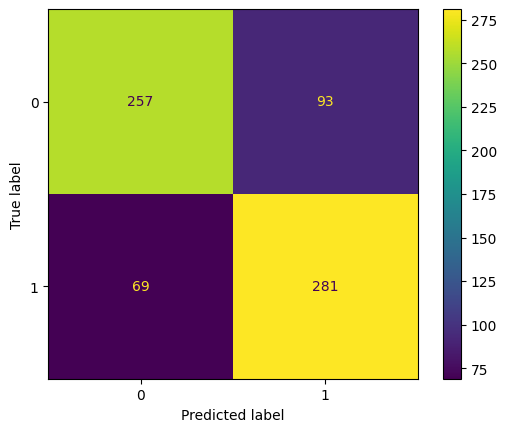

Performances sur les données de test
Accuracy :  0.35
Recall :  1.0
Precision :  0.35


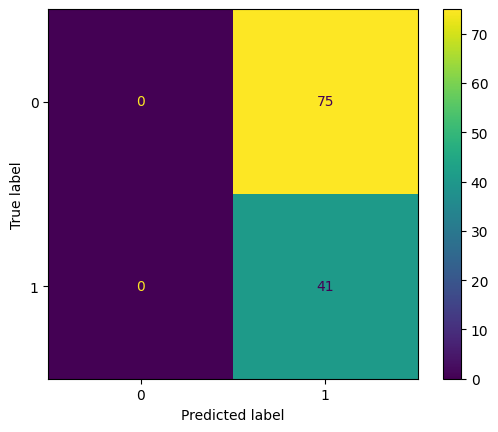

In [119]:
# evaluation du modele Support vecteur machine classifier
evaluation_models(svmc_grid_class.best_estimator_)

## D: Algorithme de KNN

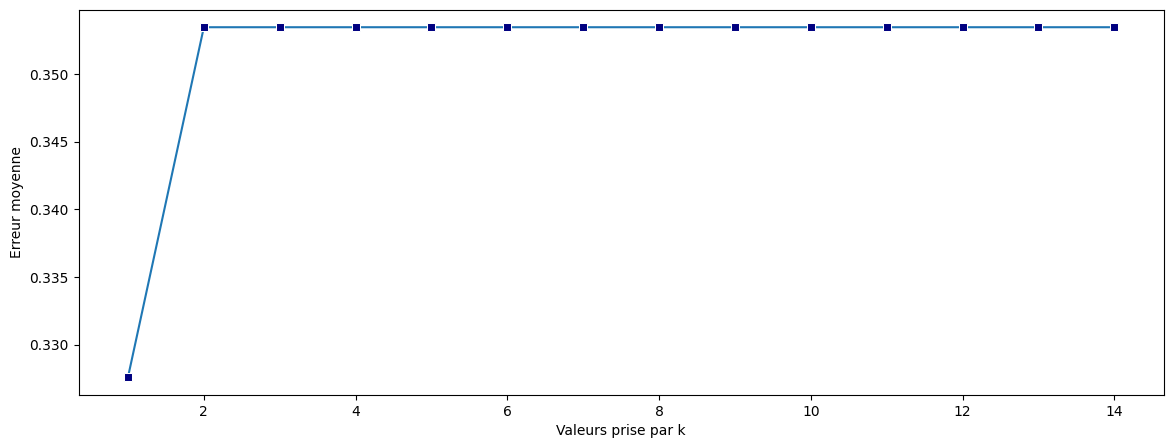

In [120]:
vect_errors=[]
for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_features,train_labels)
    y_pred= knn.predict(x_test)
    error = np.mean(y_test != y_pred)
    vect_errors.append(error)
# visualisation
plt.figure(figsize=(14,5))
sns.lineplot(x=range(1,15), y=vect_errors, marker="s", markerfacecolor="navy")
plt.xlabel('Valeurs prise par k')
plt.ylabel('Erreur moyenne')
plt.show()
best_k = np.argmin(vect_errors)+1


Performances sur les données d'entrainemment
Accuracy :  0.88
Recall :  0.87
Precision :  0.88


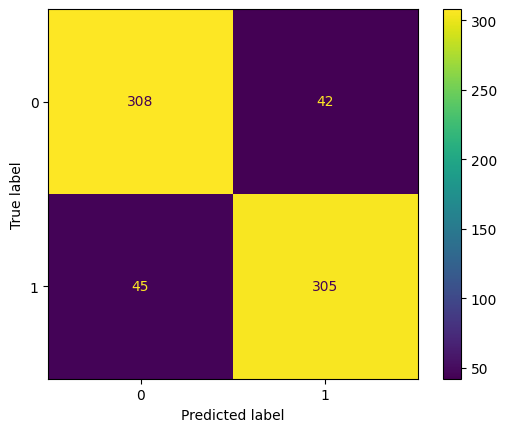

Performances sur les données de test
Accuracy :  0.65
Recall :  0.0
Precision :  0.0


e:\exerces G-6\AED\Projets_reel\diabetes\.venv_diabete\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


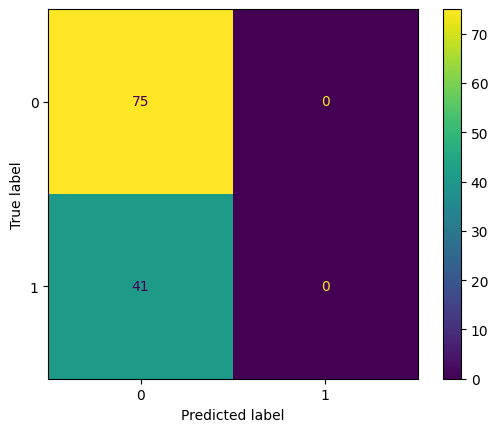

In [121]:
# evaluation du modele k plus proche voisin classifier
best_k=4
knnc=KNeighborsClassifier(n_neighbors=best_k)
knnc_model=knnc.fit(train_features,train_labels)
evaluation_models(knnc_model)

## E: Abre de décision

In [122]:
# definition de la classe
tree = DecisionTreeClassifier(random_state=seed)
# dictionnaire des hyperparametres
grid_params ={"criterion" :["gini", "entropy"], "max_depth" :[2,5,10,20,30,50,100,500,1000]}
 # recherche des hypermarametres
grid_class = GridSearchCV(estimator=tree, 
                          param_grid=grid_params,
                          scoring="f1",cv=5)

# enrainement du modele
tree_grid_class = grid_class.fit(train_features,train_labels)

# affichage des hyperparametres

print("Parametres optimaux: ",tree_grid_class.best_estimator_)
print("Score : ",tree_grid_class.best_score_)

Parametres optimaux:  DecisionTreeClassifier(max_depth=20, random_state=95)
Score :  0.8643787223188747


Performances sur les données d'entrainemment
Accuracy :  1.0
Recall :  1.0
Precision :  1.0


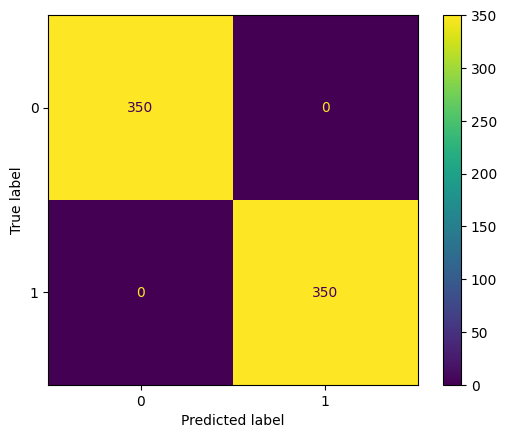

Performances sur les données de test
Accuracy :  0.65
Recall :  0.0
Precision :  0.0


e:\exerces G-6\AED\Projets_reel\diabetes\.venv_diabete\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


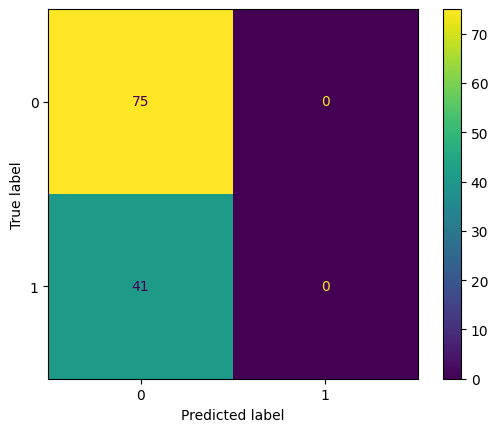

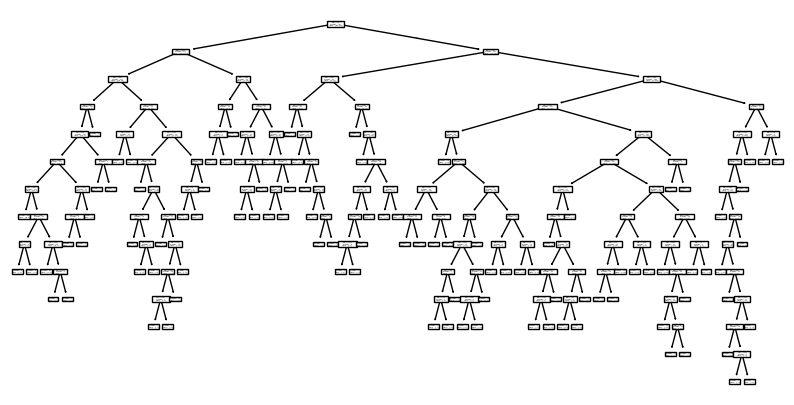

In [123]:
# evaluation du model tree
evaluation_models(tree_grid_class.best_estimator_)
# construction de l'arbre
plt.figure(figsize=(10,5))
plot_tree(tree_grid_class.best_estimator_, feature_names=x.columns)
plt.show()

# Conclusion


In [124]:
model_diabete = joblib.dump(rf_grid_class.best_estimator_,"datasets_bd/db/model_diabete.joblib")

In [125]:
train_features.median()

Glucose                     0.621212
BMI                         0.570681
Age                         0.166667
DiabetesPedigreeFunction    0.137939
BloodPressure               0.631579
Pregnancies                 0.205882
dtype: float64

col1, col2 = st.columns(2)

with col1:
    st.checkbox("Disable selectbox widget", key="disabled")
    st.radio(
        "Set selectbox label visibility 👉",
        key="visibility",
        options=["visible", "hidden", "collapsed"],
    )

with col2:
    option = st.selectbox(
        "How would you like to be contacted?",
        ("Email", "Home phone", "Mobile phone"),
        label_visibility=st.session_state.visibility,
        disabled=st.session_state.disabled,
    )